# IPython: beyond plain Python

Updated by [@espg](https://github.com/espg) from the 2019 ICESat2 Hackweek [intro-jupyter-git](https://github.com/ICESAT-2HackWeek/intro-jupyter-git) session, written by [@fperez](https://github.com/fperez).

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [1]:
print("Hi")

Hi


Getting help:

In [2]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [3]:
import numpy as np
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [4]:
np.isclose??

Signature: np.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
Source:   
@array_function_dispatch(_isclose_dispatcher)
def isclose(a, b, rtol=1.e-5, atol=1.e-8, equal_nan=False):
    """
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.

    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.

    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).

    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
       

In [5]:
*int*?

FloatingPointError
breakpoint
int
print

An IPython quick reference card:

In [6]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [31]:
import numpy as np
np.

SyntaxError: invalid syntax (1369985260.py, line 2)

Tab completion also works for accessing documentation. Using `Shift-TAB` after the parens will display the function or class signature:

In [9]:
np.zeros(10, dt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float16)

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [15]:
10+20;

## Accessing the underlying operating system

You can invoke the command line from within the notebook by prepending the "bang" ( `!` ) operator:  


In [ ]:
!pwd

Some of the most common shell commands will work without prepending:

In [ ]:
ls

In [ ]:
pwd

...but others require the bang operator:

In [ ]:
du

In [ ]:
!du

It's best practice to use the operator in all cases, since it makes it more explicit when you are calling the shell

In [ ]:
files = !ls 
print("files this directory:")
print(files)

In [ ]:
files

In [ ]:
!echo $files

In [ ]:
!echo {files[0].upper()}

Note that all this is available even in multiline blocks:

In [ ]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

## Beyond Python: magic functions

The IPython 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an namespace for controlling IPython itself and exposing other system-oriented functionality that is separate from your Python variables and functions.  This lets you have a `cd` command accessible as a magic regardless of whether you have a Python `cd` variable.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [ ]:
%magic

Line vs cell magics:

Magics can be applied at the single-line level or to entire cells. Line magics are identified with a single `%` prefix, while cell magics use `%%` and can only be used as the first line of the cell (since they apply to the entire cell). Some magics, like the convenient `%timeit` that ships built-in with IPython, can be called in either mode, while others may be line- or cell-only (you can see all magics with `%lsmagic`).

Let's see this with some `%timeit` examples:

In [ ]:
%timeit list(range(1000))

In [ ]:
%%timeit
# comment here

list(range(10))
list(range(100))

Line magics can be used even inside code blocks:

In [ ]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit list(range(size))

Magics can do anything they want with their input, so it doesn't have to be valid Python (note that the below may not work on a Windows machine, depending on how you are running Jupyter on it):

In [ ]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

Another interesting cell magic: create any file you want locally from the notebook:

In [ ]:
%%writefile test.txt
This is a test file.
It can contain anything I want...

And more...


In [ ]:
!cat test.txt

Let's see what other magics are currently defined in the system:

In [ ]:
%lsmagic

## Plotting in the notebook

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A little chirp')

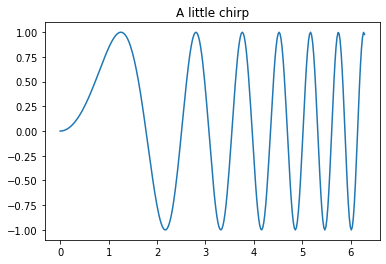

In [5]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [23]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

1
1
2
3
5
8


In [24]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:     

0 1 2 3 4 5 6 7 8 9 

And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [25]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Writing mod.py


Now let's call the function `g` with an argument that would produce an error:

In [26]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

## Basic debugging

When running code interactively, it can be tricky to figure out how to debug... 

In [28]:
%debug

> /Users/fperez/teach/stat159/2022sp/site/lectures/intro-jupyter/mod.py(3)f()
      1 
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 
      5 def g(y):



ipdb>  q


In [29]:
enjoy = input('Are you enjoying this tutorial? ')
print('enjoy is:', enjoy)

Are you enjoying this tutorial?  q


enjoy is: q


## Running code in other languages with special `%%` magics

In [30]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July